In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
audit_risk=pd.read_csv('audit_risk.csv')
trial=pd.read_csv('trial.csv')

# Individual Data Exploration

#### Audit_Risk

In [4]:
audit_risk.shape

(776, 27)

In [5]:
audit_risk.info()
audit_risk.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


#### Trial

In [6]:
trial.shape

(776, 18)

In [7]:
trial.info()
trial.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.41,4,8.51,5.0,2,44.95,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.03,6,20.53,5.5,4,7.79,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.05,6,19.45,5.5,4,7.34,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1


# Data Merging and Cleaning

1. Drop duplicate rows and columns
2. Merging of the two datasets
3. Handle categorical variable: Location_ID
4. Handle missing values
5. Handle ouliers for scaling
5. Feature Extraction for ML algorithms using corr and research

In [8]:
trial=trial.drop_duplicates(keep='first')
audit_risk=audit_risk.drop_duplicates(keep='first')

print(audit_risk.shape)
print(trial.shape)

(763, 27)
(763, 18)


In [9]:
#identical columns
trial = trial.drop(['SCORE_A','SCORE_B'], axis = 1)

In [10]:
audit_risk_columns = set(audit_risk.columns)
trial_columns = set(trial.columns)

print(audit_risk_columns)
print("-----------------------------")
print(trial_columns)
print("-----------------------------")
audit_risk_columns.intersection(trial.columns)

{'District_Loss', 'Audit_Risk', 'numbers', 'Risk_C', 'Score_MV', 'Risk_D', 'Risk', 'Prob', 'PROB', 'RiSk_E', 'Risk_A', 'LOCATION_ID', 'Score_B.1', 'TOTAL', 'Score', 'Detection_Risk', 'History', 'Risk_B', 'Inherent_Risk', 'PARA_B', 'Risk_F', 'CONTROL_RISK', 'Score_B', 'Money_Value', 'Sector_score', 'PARA_A', 'Score_A'}
-----------------------------
{'History', 'Money_Value', 'District', 'Loss', 'History_score', 'LOCATION_ID', 'MONEY_Marks', 'Risk', 'PARA_B', 'Score', 'Sector_score', 'numbers', 'LOSS_SCORE', 'Marks', 'TOTAL', 'PARA_A'}
-----------------------------


{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

#### MERGING 2 DATASETS

In [11]:
# Merging on common columns
df = audit_risk.merge(trial, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Score','Sector_score','TOTAL','numbers'], sort = False)

In [12]:
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,Audit_Risk,CONTROL_RISK,Detection_Risk,District,District_Loss,History,History_score,Inherent_Risk,LOCATION_ID,LOSS_SCORE,...,Risk_x,Risk_y,Score,Score_A,Score_B,Score_B.1,Score_MV,Sector_score,TOTAL,numbers
0,1.7148,0.4,0.5,2,2,0,2,8.574,23,2,...,1,1,2.4,0.6,0.2,0.2,0.2,3.89,6.68,5.0
1,0.5108,0.4,0.5,2,2,0,2,2.554,6,2,...,0,0,2.0,0.2,0.2,0.2,0.2,3.89,4.83,5.0
2,0.3096,0.4,0.5,2,2,0,2,1.548,6,2,...,0,0,2.0,0.2,0.2,0.2,0.2,3.89,0.74,5.0
3,3.5060,0.4,0.5,2,2,0,2,17.530,6,2,...,1,1,4.4,0.2,0.6,0.6,0.6,3.89,10.80,6.0
4,0.2832,0.4,0.5,2,2,0,2,1.416,6,2,...,0,0,2.0,0.2,0.2,0.2,0.2,3.89,0.08,5.0


In [13]:
df.columns

Index(['Audit_Risk', 'CONTROL_RISK', 'Detection_Risk', 'District',
       'District_Loss', 'History', 'History_score', 'Inherent_Risk',
       'LOCATION_ID', 'LOSS_SCORE', 'Loss', 'MONEY_Marks', 'Marks',
       'Money_Value', 'PARA_A', 'PARA_B', 'PROB', 'Prob', 'RiSk_E', 'Risk_A',
       'Risk_B', 'Risk_C', 'Risk_D', 'Risk_F', 'Risk_x', 'Risk_y', 'Score',
       'Score_A', 'Score_B', 'Score_B.1', 'Score_MV', 'Sector_score', 'TOTAL',
       'numbers'],
      dtype='object')

#### HANDLING CATEGORICAL COLUMNS

In [14]:
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [15]:
df=df[~df.LOCATION_ID.str.contains("LOHARU")]
df=df[~df.LOCATION_ID.str.contains("NUH")]
df=df[~df.LOCATION_ID.str.contains("SAFIDON")]

#Converting the LOCATION_ID column with replaced string values to a float column
df['LOCATION_ID'] = df['LOCATION_ID'].astype(float)

#### HANDLING MISSING DATA

In [16]:
df.isnull().sum()

Audit_Risk        0
CONTROL_RISK      0
Detection_Risk    0
District          0
District_Loss     0
History           0
History_score     0
Inherent_Risk     0
LOCATION_ID       0
LOSS_SCORE        0
Loss              0
MONEY_Marks       0
Marks             0
Money_Value       1
PARA_A            0
PARA_B            0
PROB              0
Prob              0
RiSk_E            0
Risk_A            0
Risk_B            0
Risk_C            0
Risk_D            0
Risk_F            0
Risk_x            0
Risk_y            0
Score             0
Score_A           0
Score_B           0
Score_B.1         0
Score_MV          0
Sector_score      0
TOTAL             0
numbers           0
dtype: int64

In [17]:
df = df.fillna(df["Money_Value"].mean())
type(df)

pandas.core.frame.DataFrame

#### HANDLING OUTLIERS FOR SCALING

It is a possibility that the features might vary in magnitude or unit of measurement. Most of the machine learning algorithms are sensitive to the data scale. The features with high magnitudes will dominate the calculations lot more than features with low magnitudes. We perform scaling to supress this effect. 

Outliers tend to affect the algorithms a lot. Hence we need to calculate their occurence in each of the columns.

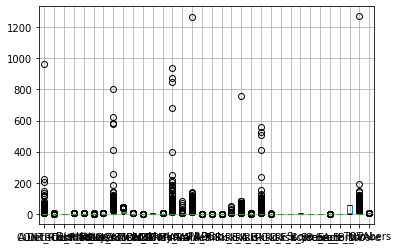

In [18]:
c=list(df.columns)
boxplot = df.boxplot(column=c)

In [19]:
from numpy import mean
from numpy import std

cols_with_outliers = []
print('Outliers in: ')
for i in df:
    data_mean, data_std = mean(df[i]), std(df[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in df[i] if x < lower or x > upper]
    print(i + ' %d' % len(outliers))
    if len(outliers)>0:
        cols_with_outliers.append(i)

Outliers in: 
Audit_Risk 6
CONTROL_RISK 15
Detection_Risk 0
District 0
District_Loss 0
History 15
History_score 15
Inherent_Risk 7
LOCATION_ID 0
LOSS_SCORE 22
Loss 21
MONEY_Marks 0
Marks 22
Money_Value 6
PARA_A 7
PARA_B 1
PROB 22
Prob 15
RiSk_E 6
Risk_A 7
Risk_B 1
Risk_C 22
Risk_D 6
Risk_F 15
Risk_x 0
Risk_y 0
Score 0
Score_A 0
Score_B 0
Score_B.1 22
Score_MV 0
Sector_score 0
TOTAL 2
numbers 22


In [20]:
print(cols_with_outliers)
result = [cols_with_outliers[i:i+8] for i in range(0, len(cols_with_outliers), 8)]

['Audit_Risk', 'CONTROL_RISK', 'History', 'History_score', 'Inherent_Risk', 'LOSS_SCORE', 'Loss', 'Marks', 'Money_Value', 'PARA_A', 'PARA_B', 'PROB', 'Prob', 'RiSk_E', 'Risk_A', 'Risk_B', 'Risk_C', 'Risk_D', 'Risk_F', 'Score_B.1', 'TOTAL', 'numbers']


(0, 5)

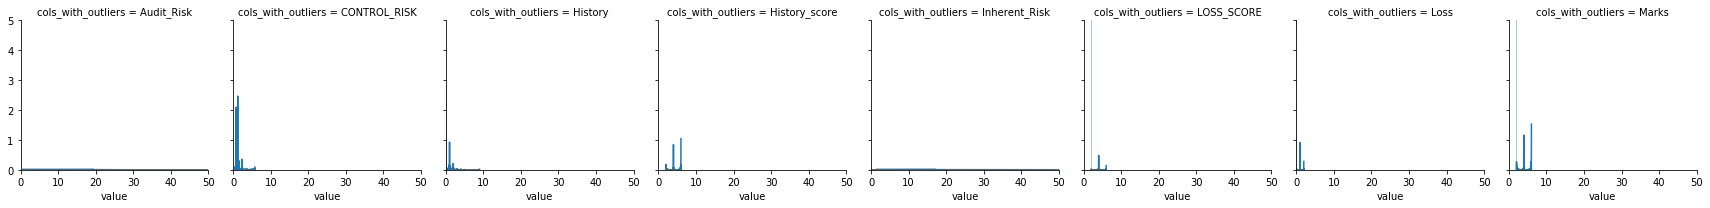

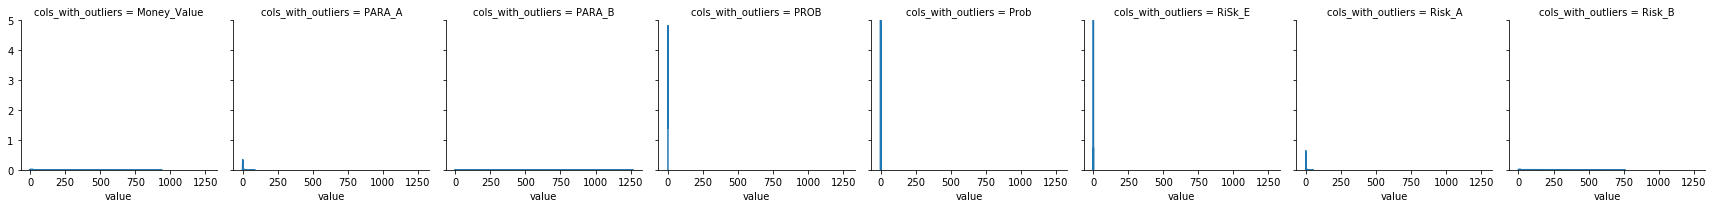

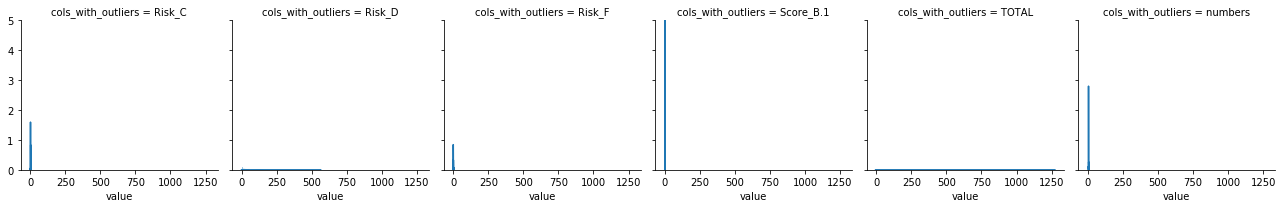

In [21]:
plot = pd.DataFrame(df, columns = result[0])
plot_melt = plot.melt(var_name='cols_with_outliers')
plot = sns.FacetGrid(plot_melt, col='cols_with_outliers')
plot = (plot.map(sns.distplot, 'value'))
axes = plot.axes
axes[0,0].set_ylim(0,5)
axes[0,0].set_xlim(0,50)

plot = pd.DataFrame(df, columns = result[1])
plot_melt = plot.melt(var_name='cols_with_outliers')
plot = sns.FacetGrid(plot_melt, col='cols_with_outliers')
plot = (plot.map(sns.distplot, 'value'))
axes = plot.axes
axes[0,0].set_ylim(0,5)

plot = pd.DataFrame(df, columns = result[2])
plot_melt = plot.melt(var_name='cols_with_outliers')
plot = sns.FacetGrid(plot_melt, col='cols_with_outliers')
plot = (plot.map(sns.distplot, 'value'))
axes = plot.axes
axes[0,0].set_ylim(0,5)

TYPE OF SCALING: 

Since it is evident from the above distribution plots that the distribution of data is not Gaussian, we will use MinMax Scaler to obtain smaller SD.
    

## Feature Extraction

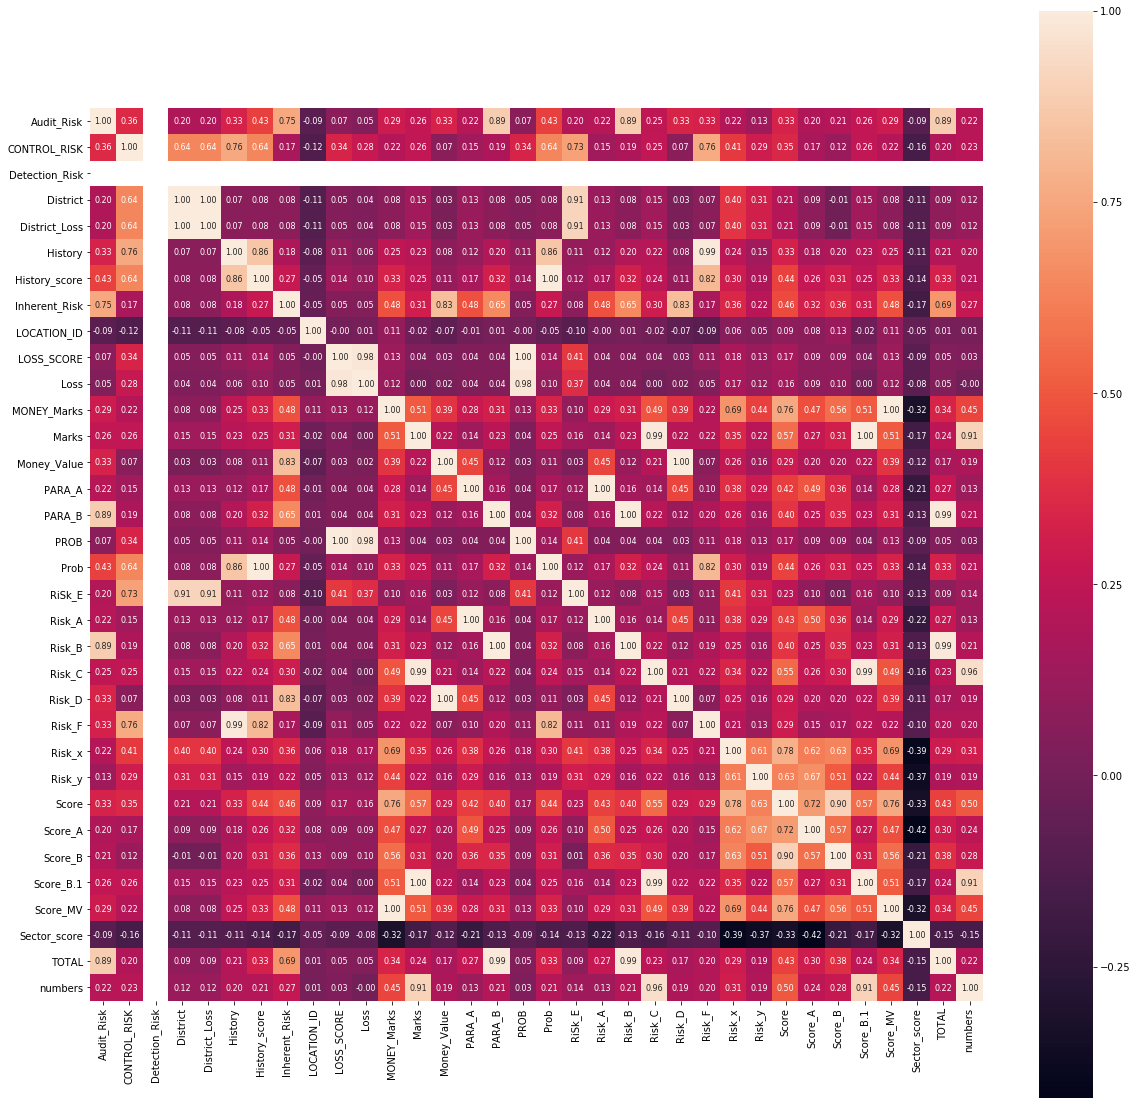

In [22]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)


INFERENCES: 

From the above correlation, we can draw conclusions as follows: 
1. The column Detection_Risk has all values 0.5 and thus can be removed
2. Presence of highly correlated pairs(corr = 1) : PARA_A and Risk_A, PARA_B and Risk_B, Score_B.1 and Marks, Risk_D and Money_Value, Score_MV and MONEY_Marks, District_Loss and District, PROB and LOSS_SCORE, Prob and History_Score
3. RiSk_E and District, Risk_F and History, Score and Score_B and several others with corr = 0.99, 0.98, 0.91 etc

As it is important to have independent variables to reduce multicolinearity, we can consider only one column from each of the above pairs.

In [23]:
df['Detection_Risk'].value_counts()

0.5    760
Name: Detection_Risk, dtype: int64

In [24]:
df = df.drop(['Detection_Risk','Risk_A','Risk_B','Score_B.1','Risk_D','MONEY_Marks',
              'RiSk_E','Risk_F','Score','Risk_C','District'], axis = 1)

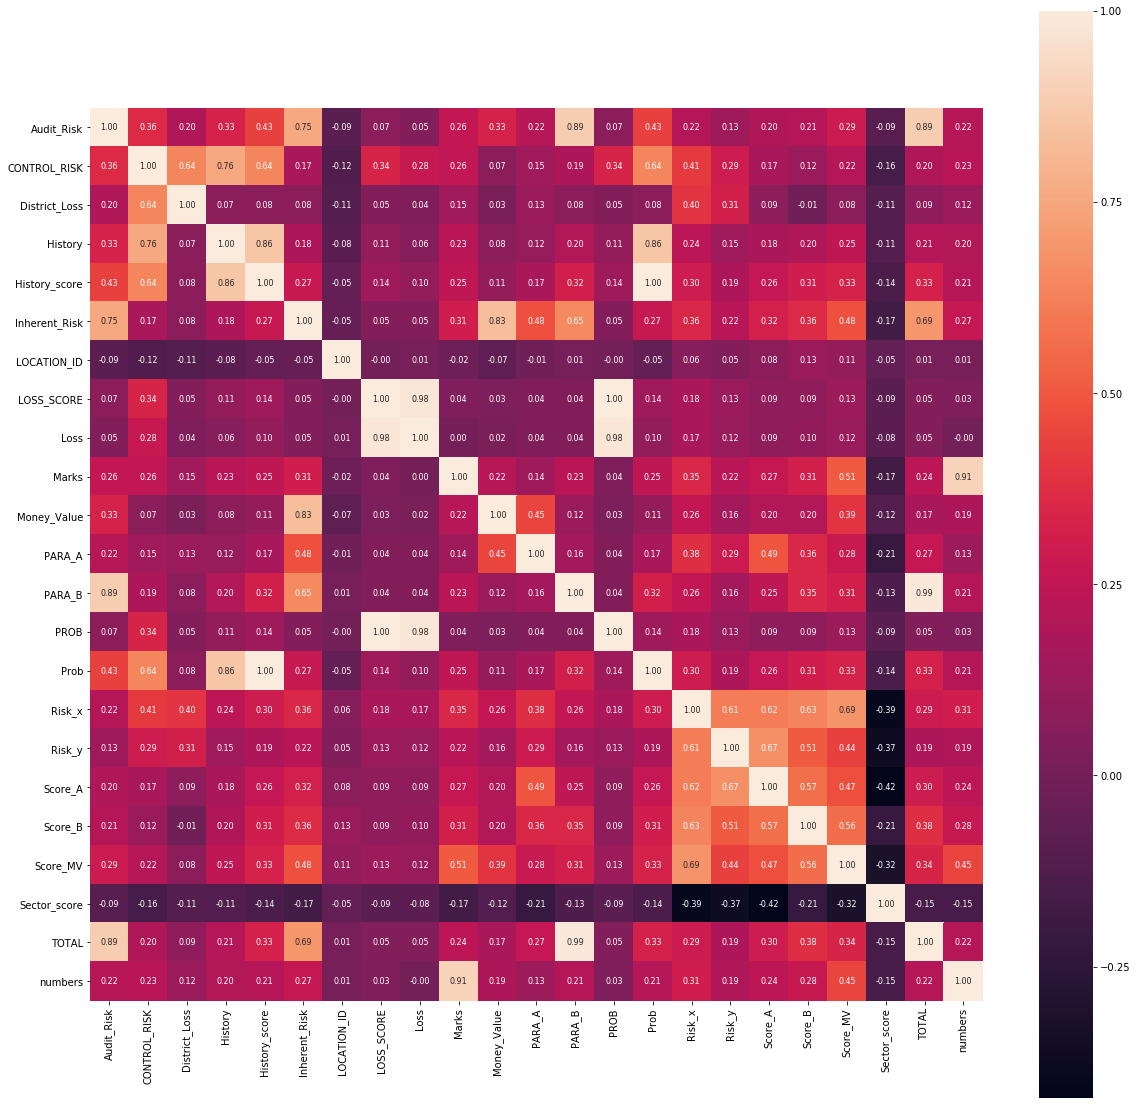

In [25]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

INFERENCE: 

It can be noted that inspite of removing the factors, their original dependants still continue to be highly correlated with other factors. Eg. Score_B.1 and Marks had corr = 1 due to which Score_B.1 was removed. But Marks still has a correl = 0.91 with numbers(Historical discrepancy score) which is an important risk factor. We therefore continue to drop other columns in the dataset df

This scenario continues for other pairs and thus factors: PARA_A, PARA_B, numbers, Money_Value, Sector_score, District, History and Loss seem to be important and prove independent for the outcome variables

RESEARCH:

The research conducted originally on this dataset made use of Particle Swarm optimization(PSO) for feature extraction. It minimizes the total root of squared differences between Audit risk and total of product of features and their respective weights. According to their analysis the Fraud was dependent on: PARA_A, PARA_B, numbers, Money_Value, Sector_score, History, District, Loss

Thus through study and inference from the results of the correlation we were able to identify and extract the dependent features.

In [26]:
df = df.drop(['Score_A','Score_B','LOCATION_ID','Loss','LOSS_SCORE','Score_MV','Inherent_Risk','CONTROL_RISK'], axis = 1)
#'Marks'

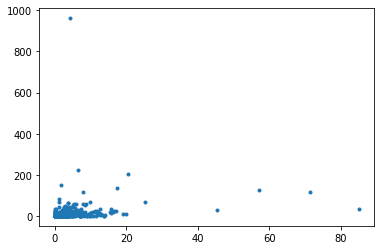

In [28]:
plt.plot(df['PARA_A'],df['Audit_Risk'],'.')

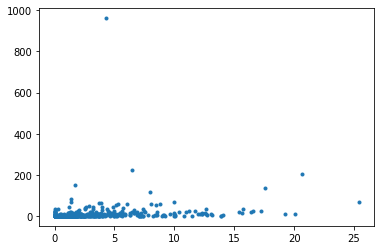

In [29]:
df=df[abs(df['PARA_A'])<40]
plt.plot(df['PARA_A'],df['Audit_Risk'],'.')

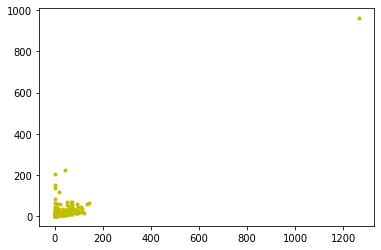

In [31]:
plt.plot(df['PARA_B'],df['Audit_Risk'],'.',c='y')

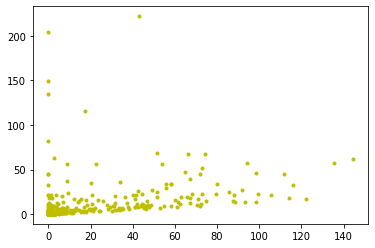

In [32]:
df=df[abs(df['PARA_B'])<200]
plt.plot(df['PARA_B'],df['Audit_Risk'],'.',c='y')

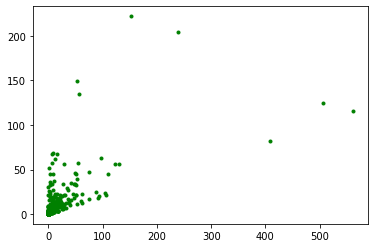

In [118]:
plt.plot(df['Money_Value'],df['Audit_Risk'],'.',c='g')

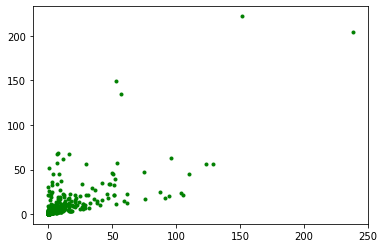

In [119]:
df=df[abs(df['Money_Value'])<300]
plt.plot(df['Money_Value'],df['Audit_Risk'],'.',c='g')

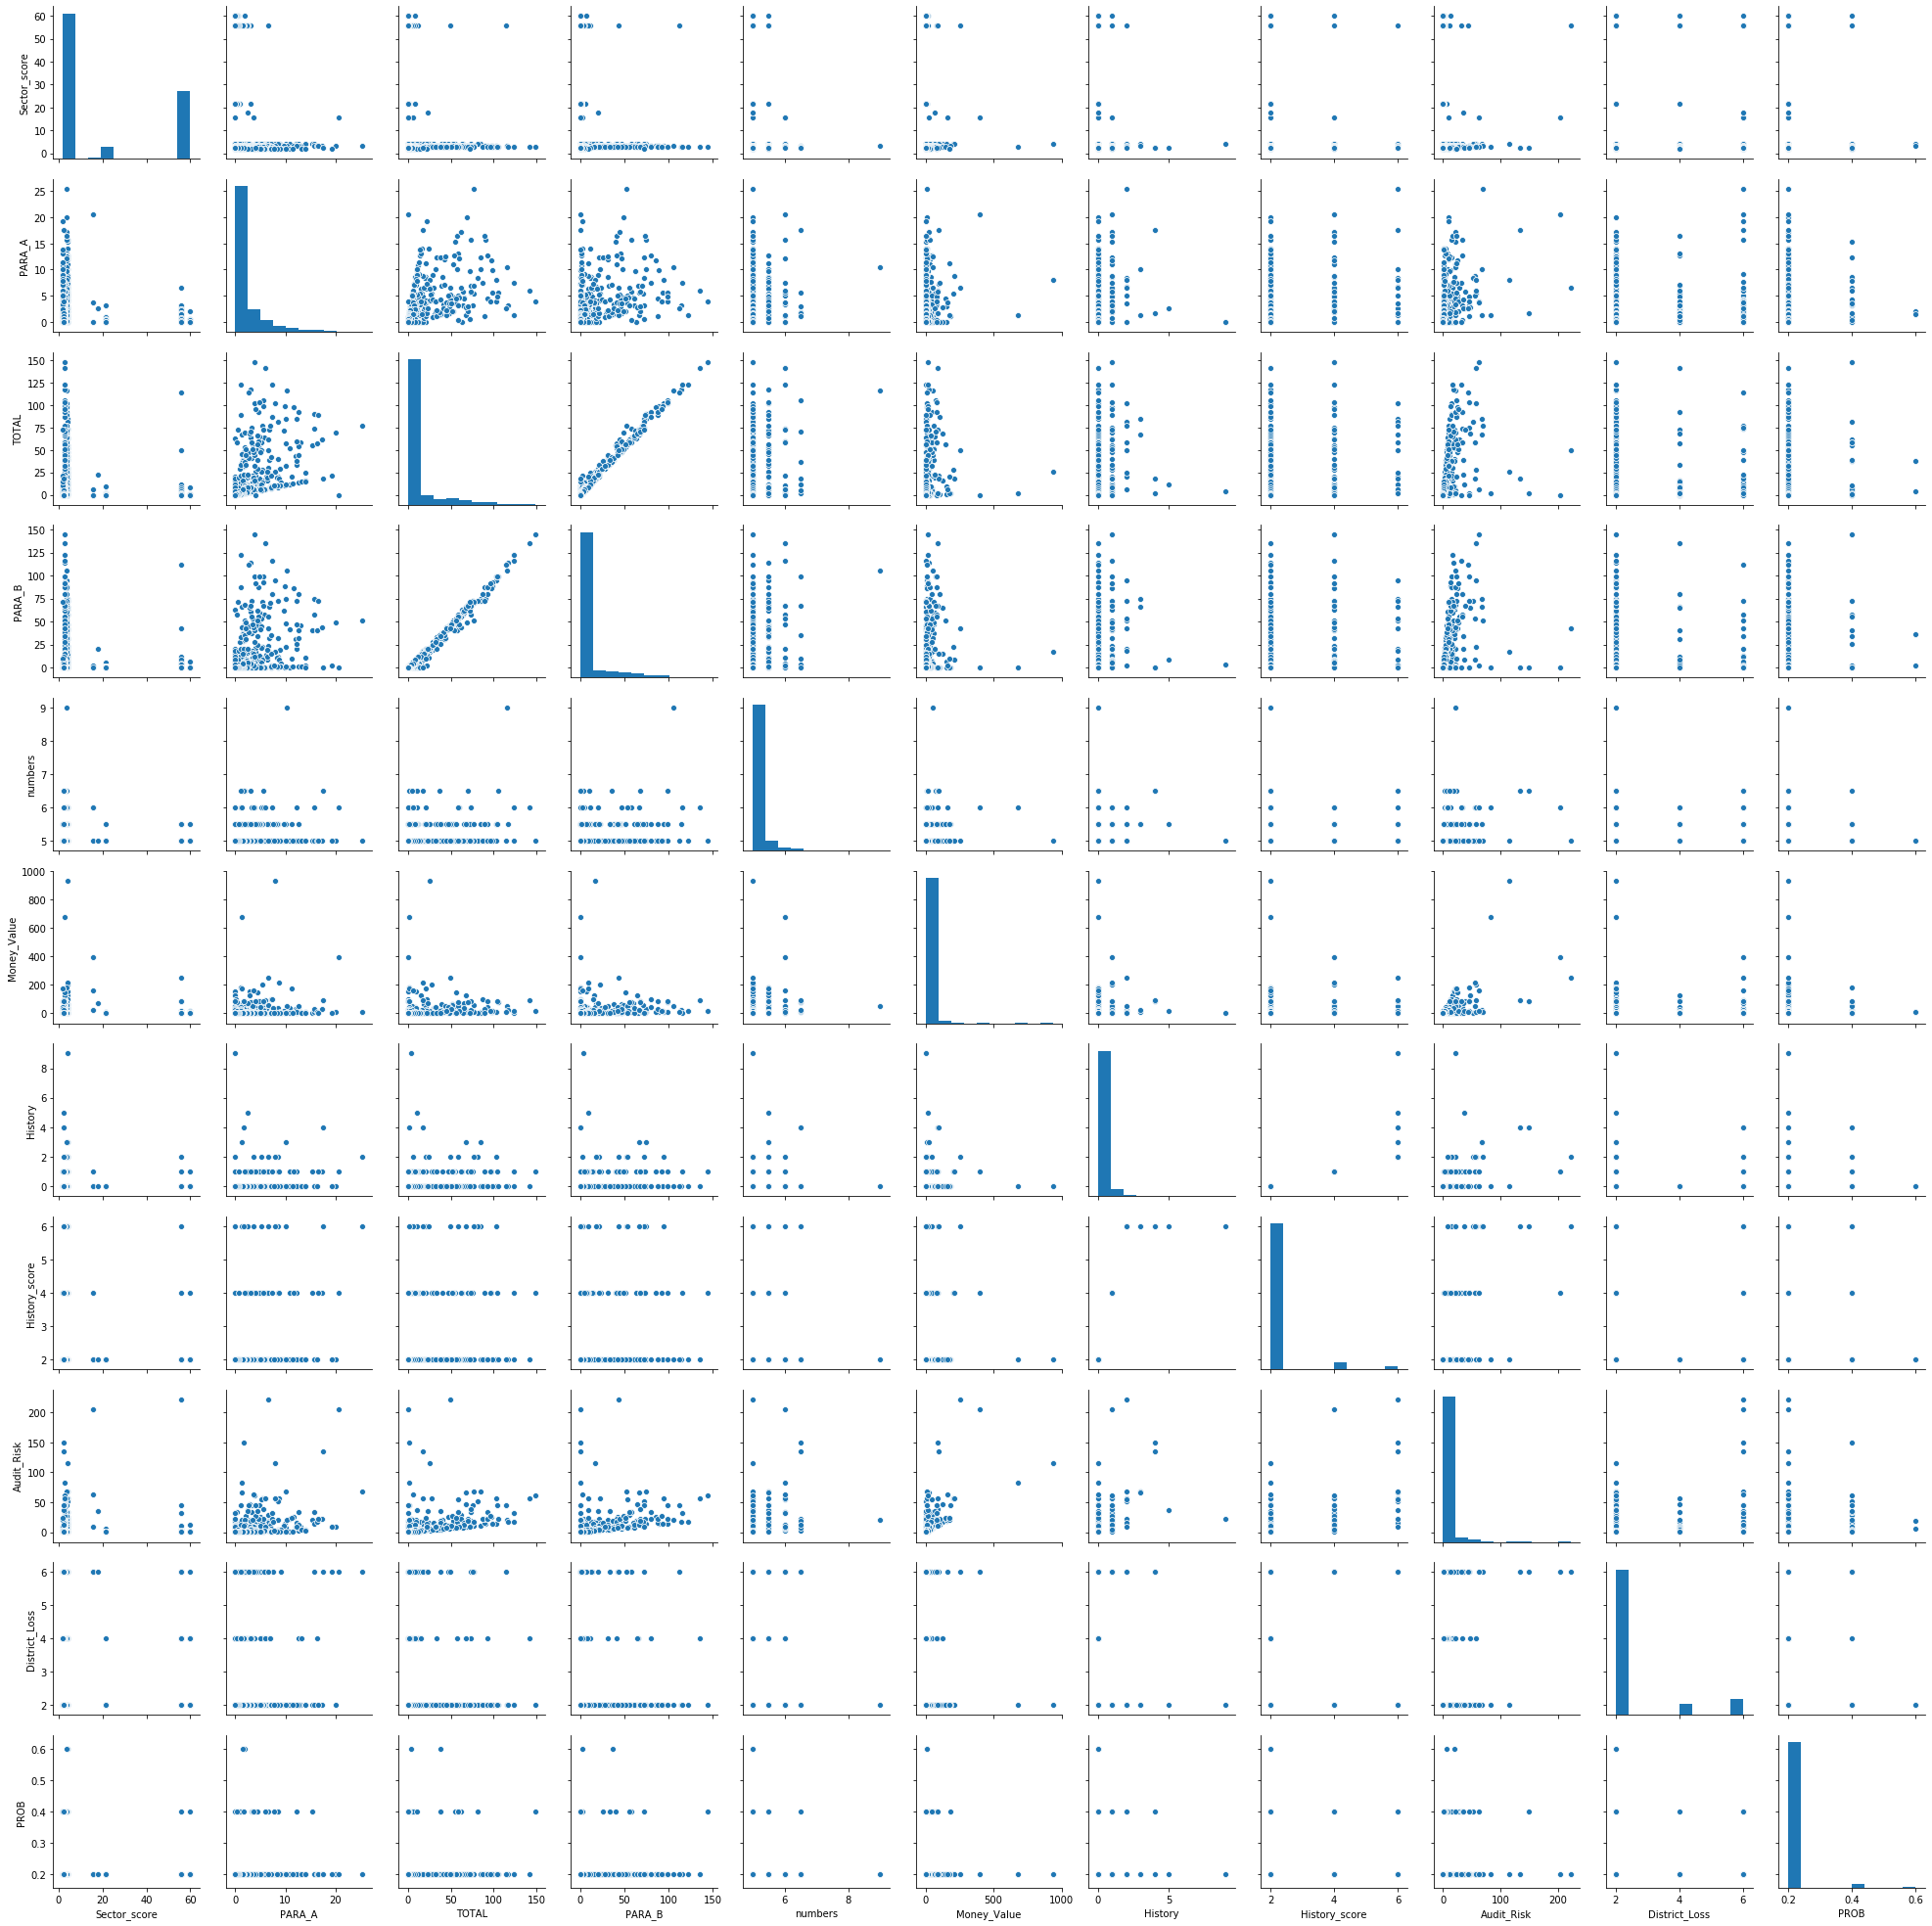

In [34]:
df.columns
sns.pairplot(df[['Sector_score','PARA_A','TOTAL','PARA_B','numbers','Money_Value','History',
                 'History_score','Audit_Risk','District_Loss','PROB']].dropna(how = 'any', axis = 0))

In [35]:
df.columns

Index(['Audit_Risk', 'District_Loss', 'History', 'History_score', 'Marks',
       'Money_Value', 'PARA_A', 'PARA_B', 'PROB', 'Prob', 'Risk_x', 'Risk_y',
       'Sector_score', 'TOTAL', 'numbers'],
      dtype='object')

In [36]:
df['RISK'] = df['Risk_x'] | df['Risk_y']
df = df.drop(['Risk_x','Risk_y'], axis = 1)

In [37]:
y1 = df['Audit_Risk']
x = df.drop(['Audit_Risk','RISK'], axis = 1)

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 762
Data columns (total 12 columns):
District_Loss    755 non-null int64
History          755 non-null int64
History_score    755 non-null int64
Marks            755 non-null int64
Money_Value      755 non-null float64
PARA_A           755 non-null float64
PARA_B           755 non-null float64
PROB             755 non-null float64
Prob             755 non-null float64
Sector_score     755 non-null float64
TOTAL            755 non-null float64
numbers          755 non-null float64
dtypes: float64(8), int64(4)
memory usage: 76.7 KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

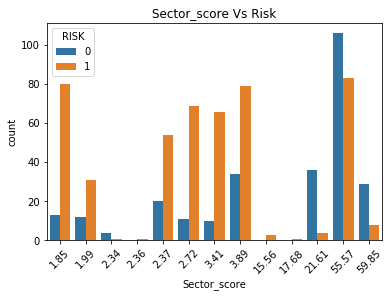

In [48]:
sns.countplot(x='Sector_score',data=df[['Sector_score','RISK']],hue="RISK").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

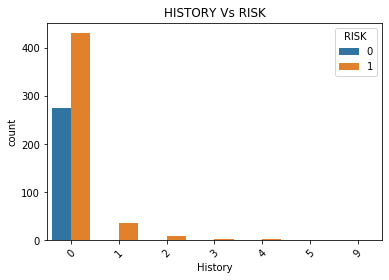

In [50]:
sns.countplot(x='History',data=df[['History','RISK']],hue="RISK").set_title("HISTORY Vs RISK")
plt.xticks(rotation=45)

# Data Preparation

1. Create a csv file to record the best parameters and model evaluations. This can be later used to find the best regressor for this dataset
2. Applied Scaling and split the dataset into train and test



In [39]:
#with open('result.csv', 'w', encoding='utf-8') as f:
   # df.to_csv(f, index=False)
    
f = open('Project_SR_NY.csv', 'w')
line = 'Model,Best params,Train score,Test score\n'
f.write(line)
f.close()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y1, random_state = 0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)



# ML FOR REGRESSION

1. Linear Regression
2. KNN Regressor
3. Ridge
4. Lasso
6. SVR
7. Polynomial
8. SGD Regressor

#### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

print('Train score: %.4f'%lr.score(x_train, y_train))
print('Test score: %.4f'%lr.score(x_test, y_test))

f = open('Project_SR_NY.csv', 'a')
line  = 'LinearRegression,,'+ str(lr.score(x_train, y_train)) + ',' + str(lr.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

Train score: 0.8167
Test score: -0.3147


Text(0.5, 0, 'RM')

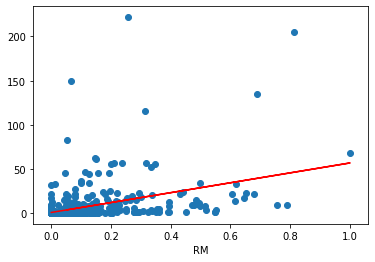

In [42]:
%matplotlib inline

x_train_rm = x_train[:,5].reshape(-1,1)
lr.fit(x_train_rm, y_train)
y_predict = lr.predict(x_train_rm)

plt.plot(x_train_rm, y_predict, c = 'r')
plt.scatter(x_train_rm,y_train)
plt.xlabel('RM')

Text(0.5, 0, 'RM')

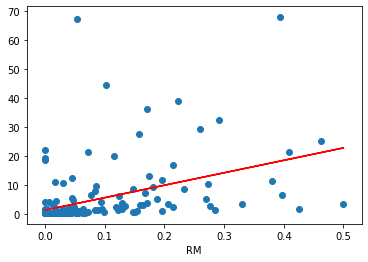

In [43]:
%matplotlib inline

x_test_rm = x_test[:,5].reshape(-1,1)
lr.fit(x_test_rm, y_test)
y_predict = lr.predict(x_test_rm)

plt.plot(x_test_rm, y_predict, c = 'r')
plt.scatter(x_test_rm,y_test)
plt.xlabel('RM')

In [44]:
#Splitting the data for crossvalidation grid search

x_trainval, x_test, y_trainval, y_test = train_test_split(x, y1, random_state=0)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, random_state=1)

print("Size of training set: {} \nSize of validation set: {} \nSize of test set:"
      " {}\n".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

best_score = 0

Size of training set: 424 
Size of validation set: 142 
Size of test set: 189



#### K Neighbors Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

for n_neighbors in range(1,10):
    for weights in ['uniform', 'distance']:
        knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights = weights)
        # perform cross-validation
        scores = cross_val_score(knn, x_trainval, y_trainval, cv=10)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n_neighbors, 'weights': weights}
            
# rebuild a model on the combined training and validation set
knn = KNeighborsRegressor(**best_parameters)
knn.fit(x_trainval, y_trainval)

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)
x_train_org, x_test_org, y_train, y_test = train_test_split(x, y1, random_state = 0)
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.fit_transform(x_test_org)

grid_search.fit(x_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.68


/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
knn = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

1.0
0.7172670084839459


In [67]:
from sklearn import metrics
knn_tr_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
knn_tr_mse = metrics.mean_squared_error(y_train, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train rmse: ', knn_tr_rmse)
print('test rmse: ', knn_test_rmse)

print('train score: ', knn.score(x_train, y_train))
print('test score: ', knn.score(x_test, y_test) )

train rmse:  0.0
test rmse:  7.466442993644748
train score:  1.0
test score:  0.7172670084839459


In [68]:
f = open('Project_SR_NY.csv', 'a')
line  = 'KNeighborsRegressor,'+'n_neighbors = 7,'+ str(knn.score(x_train, y_train)) + ',' + str(knn.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

#### Ridge

In [69]:
from  sklearn.linear_model import Ridge
%matplotlib inline

for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha = alpha)
    scores = cross_val_score(ridge, x_trainval, y_trainval, cv=10)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
ridge = Ridge(**best_parameters)
ridge.fit(x_trainval, y_trainval)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
x_train_org, x_test_org, y_train, y_test = train_test_split(x, y1, random_state = 0)
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.fit_transform(x_test_org)

grid_search.fit(x_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'alpha': 1}
Best cross-validation score: 0.76


/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


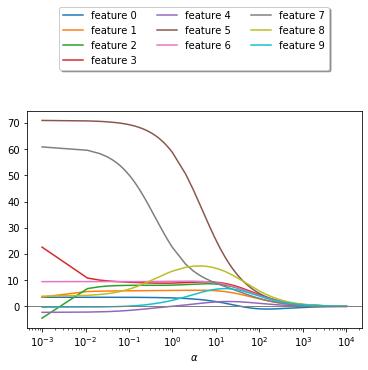

In [70]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [71]:
ridge = Ridge(alpha = 1)
ridge.fit(x_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(x_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(x_test, y_test)))

Train score: 0.7928
Test score: 0.6711


In [72]:
from sklearn import  metrics
ridge_tr_pred = ridge.predict(x_train)
ridge_test_pred =ridge.predict(x_test)
ridge_tr_mse = metrics.mean_squared_error(y_train,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train rmse: ', ridge_tr_rmse)
print('test rmse: ', ridge_test_rmse)

train rmse:  6.742561466052637
test rmse:  8.052858401586073


In [73]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Ridge,'+'alpha = 100,'+ str(ridge.score(x_train,y_train)) + ',' + str(ridge.score(x_test,y_test)) + '\n'
f.write(line)
f.close()

#### Lasso

In [74]:
from sklearn.linear_model import Lasso

for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    lasso = Lasso(alpha = alpha)
    scores = cross_val_score(lasso, x_trainval, y_trainval, cv=10)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(x_trainval, y_trainval)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
x_train_org, x_test_org, y_train, y_test = train_test_split(x, y1, random_state = 0)
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.fit_transform(x_test_org)

grid_search.fit(x_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4237.244207434459, tolerance: 11.857968337715992
  positive)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10565.666098577722, tolerance: 11.82610487896083
  positive)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10101.783709949821, tolerance: 11.816326893165098
  positive)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.75


/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


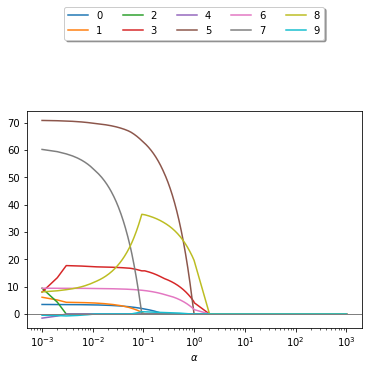

In [75]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = i)

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=5, fancybox=True, shadow=True)
plt.show()

In [76]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(x_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(x_test, y_test)))

Train score: 0.7814
Test score: 0.6598


In [77]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(x_train)
lasso_test_pred =lasso.predict(x_test)
lasso_tr_mse = metrics.mean_squared_error(y_train,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train rmse: ', lasso_tr_rmse)
print('test rmse: ', lasso_test_rmse)

train rmse:  6.924816924883677
test rmse:  8.189796723425784


In [78]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Lasso,'+'alpha = 1,'+ str(lasso.score(x_train,y_train)) + ',' + str(lasso.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

#### SVR

In [79]:
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01,0.1, 1, 10, 100]}
 
svm_r = SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=5, return_train_score=True)
    
#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(x_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.55


/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [80]:
# SVM Linear
from sklearn import svm
svm_r = SVR(kernel='linear', C = 100, gamma = 0.001)
svm_r.fit(x_train, y_train)

svmr_tr_pred = svm_r.predict(x_train)
svmr_test_pred = svm_r.predict(x_test)

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train rmse: ', svm_tr_rmse)
print('test rmse: ', svm_test_rmse)

train rmse:  8.926480420188291
test rmse:  8.968007062614197


In [81]:
# SVM RBF
svm_r = SVR(kernel='rbf', C = 100, gamma = 0.001)
svm_r.fit(x_train, y_train)

svmr_tr_pred = svm_r.predict(x_train)
svmr_test_pred = svm_r.predict(x_test)

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train rmse: ', svm_tr_rmse)
print('test rmse: ', svm_test_rmse)

train rmse:  12.568612337800321
test rmse:  11.94552739082462


In [82]:
sv = SVR(kernel='rbf', C = 100, gamma = 0.001)
sv.fit(x_train,y_train)
print('Train score: {:.4f}'.format(sv.score(x_train,y_train)))
print('Test score: {:.4f}'.format(sv.score(x_test, y_test)))

Train score: 0.2799
Test score: 0.2763


In [83]:
f = open('Project_SR_NY.csv', 'a')
line  = 'SVR,'+'C = 100 gamma = 0.001,'+ str(sv.score(x_train,y_train)) + ',' + str(sv.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model_PolySVM = SVR(kernel = 'poly', degree = 2)
param_PolySVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Defined Parameters:\n{}".format(param_PolySVM))

grid_PolySVM = GridSearchCV(model_PolySVM, param_grid = param_PolySVM, cv=5, return_train_score=True)
grid_PolySVM.fit(x_train, y_train)

print("Best parameters: {}".format(grid_PolySVM.best_params_))

print("Best cross-validation accuracy: {:.2f}".format(grid_PolySVM.best_score_))
print("Best parameters: {}".format(grid_PolySVM.best_params_))
print("Train Set Score: {}".format(grid_PolySVM.score(x_train, y_train)))
print("Test Set Score: {}".format(grid_PolySVM.score(x_test, y_test)))

Defined Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
f = open('Project_SR_NY.csv', 'a')
line  = 'SVM kernel Poly,'+'c = 10 gamma = 1,'+str(grid_PolySVM.score(x_train, y_train))+','+str(grid_PolySVM.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

#### Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr.fit(x_train_poly, y_train)
    train_score_list.append(lr.score(x_train_poly, y_train))
    test_score_list.append(lr.score(x_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

In [ ]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Polynomial,'+'degree = 1,'+ str(train_score_list[0]) + ',' + str(test_score_list[0]) + '\n'
f.write(line)
f.close()

#### SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for max_iter in [1000, 5000, 10000]:
        sgd  = SGDRegressor(alpha = alpha, max_iter = max_iter, random_state = 0)
        scores = cross_val_score(sgd, x_trainval, y_trainval, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha, 'max_iter' : max_iter}
            
# rebuild a model on the combined training and validation set
sgd = SGDRegressor(**best_parameters)
sgd.fit(x_trainval, y_trainval)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter' : [1000, 5000, 10000]}

grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=10, return_train_score=True)
x_train_org, x_test_org, y_train, y_test = train_test_split(x, y1, random_state = 0)
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.fit_transform(x_test_org)

grid_search.fit(x_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



In [84]:
sgd = SGDRegressor(alpha = 1, max_iter = 10000)
sgd.fit(x_train,y_train)
print('Train score: {:.4f}'.format(sgd.score(x_train,y_train)))
print('Test score: {:.4f}'.format(sgd.score(x_test, y_test)))

/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Train score: 0.1132
Test score: 0.1153


In [85]:
f = open('Project_SR_NY.csv', 'a')
line  = 'SGDRegressor,'+'alpha = 1 max_iter = 10000,'+ str(sgd.score(x_train,y_train)) + ',' + str(sgd.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

RESULT:

A file entry is generated after every algorithm storing the best values for the parameter and the train and test scores. On observing this file it is evident that Ridge algorithm performed the best on the generalisation of the test data.

Therefore we run a final ridge regression on the entire dataset

In [86]:
ridge = Ridge(alpha = 1)
ridge.fit(x_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(x_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(x_test, y_test)))

Train score: 0.7928
Test score: 0.6711


# ML FOR CLASSIFICATION

1. Prepare the dataset for classification
2. Scaling
3. KNN Classifier
4. Logistic regression
5. Kernalized SVM
6. Decision Tree
7. Linear SVM
8. Result

In [87]:
df_c = df[['PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'Sector_score', 'History', 'District_Loss', 'Loss', 'Risk_x']]
y = df_c['Risk_x']
x = df_c.drop(['Risk_x'], axis = 1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, random_state = 0)
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train_org)
#x_test = scaler.fit_transform(x_test_org)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_score_array.append(knn.score(x_train, y_train))
    test_score_array.append(knn.score(x_test, y_test))
    
print(train_score_array)
print(test_score_array)

[1.0, 0.9769503546099291, 0.9769503546099291, 0.9680851063829787, 0.9698581560283688, 0.9698581560283688, 0.9698581560283688, 0.9680851063829787, 0.9663120567375887]
[0.9627659574468085, 0.9521276595744681, 0.9627659574468085, 0.9521276595744681, 0.9521276595744681, 0.9468085106382979, 0.9521276595744681, 0.9414893617021277, 0.9414893617021277]


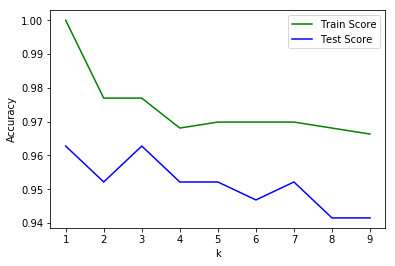

In [90]:
x_axis = range(1,10)
%matplotlib inline

plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [91]:
f = open('Project_SR_NY.csv', 'a')
line  = 'KNN Classifier,'+ 'k = 3' + ',' + str(train_score_array[2]) + ',' + str(test_score_array[2]) + '\n'
f.write(line)
f.close()

#### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

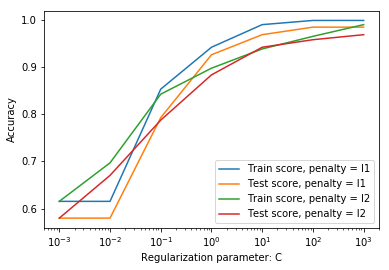

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [94]:
lr = LogisticRegression(penalty = 'l1', C = 1)
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9414893617021277
0.925531914893617


/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Logistic Regression,'+ 'penalty=l1 C=1' + ',' + str(lr.score(x_train, y_train)) + ',' + str(lr.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

#### Kerenilzed Support Vector Machine

In [96]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        svc.fit(x_train, y_train)
        train.append(svc.score(x_train, y_train))
        test.append(svc.score(x_test, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x13948f668>,
 <a list of 36 Text xticklabel objects>)

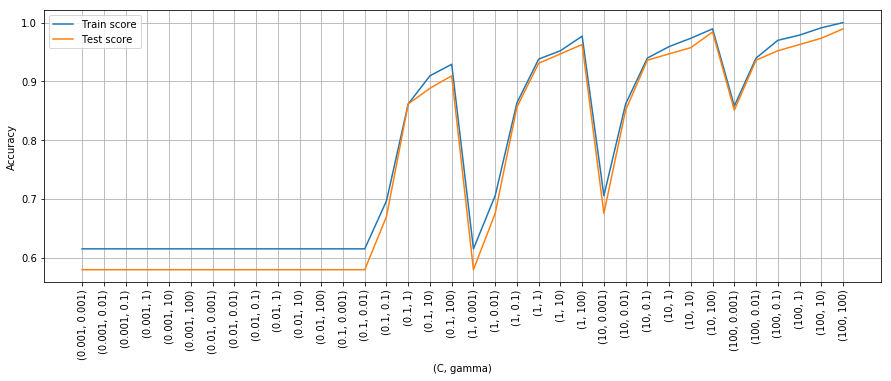

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [98]:
svc = SVC(kernel = 'rbf', C = 100, gamma = 0.01)
svc.fit(x_train, y_train)
print(svc.score(x_train, y_train))
print(svc.score(x_test, y_test))

0.9397163120567376
0.9361702127659575


In [99]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Kernel SVC,'+ 'c=100 gamma=0.01' + ',' + str(svc.score(x_train, y_train)) + ',' + str(svc.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

#### Decision Tree

In [100]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

#dtree = DecisionTreeClassifier(random_state=0, max_depth = max_depth)
#max_depth = range(1,10)
#dtree.fit(x_train, y_train)
#print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

train = []
test = []
index = []

for max_depth in range(1,10):
    dtree = DecisionTreeClassifier(random_state=0, max_depth = max_depth)
    dtree.fit(x_train, y_train)
    train.append('%.4f'%dtree.score(x_train, y_train))
    test.append('%.4f'%dtree.score(x_test, y_test))
    index.append((max_depth))

In [101]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.963


In [102]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Decision Tree Classifier,'+ 'max_depth = 4' + ',' + str(dtree.score(x_train, y_train)) + ',' + str(dtree.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

#### Linear SVC

In [103]:
%matplotlib inline
from sklearn.svm import LinearSVC

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LinearSVC(C = c)
    log_l1.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))

/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shivaniramdas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


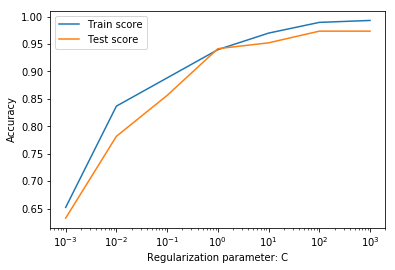

In [104]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score')
plt.plot(c_range, test_score_l1, label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [105]:
log_l1 = LinearSVC(C = 1)
log_l1.fit(x_train, y_train)
print(log_l1.score(x_train, y_train))
print(log_l1.score(x_test, y_test))

0.9397163120567376
0.9414893617021277


In [106]:
f = open('Project_SR_NY.csv', 'a')
line  = 'Linear SVC,'+ 'c=1' + ',' + str(log_l1.score(x_train, y_train)) + ',' + str(log_l1.score(x_test, y_test)) + '\n'
f.write(line)
f.close()

# RESULT

Looking at the parameter tuning and train and test score for each of the classification algorithms in the file generated, KNN CLassifier model gives us the best results. 